In [1]:
import pandas as pd
from functions import printUniques

import warnings
warnings.filterwarnings('ignore')
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

≤

In [2]:
df = pd.read_csv('students.csv','|').drop('Unnamed: 0', axis =1)

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,nulidade,U,GT3,A,4,4,at_home,teacher,...,4,3,"""4""",1,1,"""3""",6,5,6,6
1,GP,F,"""17""",U,GT3,T,1,1,at_home,other,...,5,3,"""3""",1,1,"""3""",4,5,5,6
2,GP,F,"""15""",U,LE3,T,1,1,at_home,other,...,4,3,"""2""",2,3,"""3""",10,zero,8,10
3,GP,F,"""15""",U,GT3,T,4,2,health,services,...,3,2,"""2""",1,1,"""5""",2,15,14,15
4,GP,F,sem validade,U,GT3,T,3,3,other,other,...,4,3,"""2""",1,2,"""5""",4,6,10,10


In [4]:
#df_filter = df.replace(['zero','nulidade','sem validade','"17"','"15"','"16"','"19"','"18"','"22"','"20"','"21"','"3"', '"5"' ,'"1"' ,'"2"','2' ,'"4"','yes','no','1','3','4','5','6','7','8','9','10','F','M','0','16','14','25','12','54','18','26','20','56','24','28','13','15','22','21','11','17','19','75','30','38','40','23'],[np.nan,np.nan,np.nan,17,15,16,19,18,22,20,21,3,5,1,2,2,4,1,0,1,3,4,5,6,7,8,9,10,1,0,0,16,14,25,12,54,18,26,20,56,24,28,13,15,22,21,11,17,19,75,30,38,40,23])
df_filter = df.replace(['zero','nulidade','sem validade'],np.nan)
df_filter['age'] = df_filter['age'].str.replace(r'["]', '').astype('float')
df_filter['Medu'] = df_filter['Medu'].str.replace(r'["]', '').astype('float')
df_filter['Fedu'] = df_filter['Fedu'].str.replace(r'["]', '').astype('float')
df_filter['traveltime'] = df_filter['traveltime'].str.replace(r'["]', '').astype('float')
df_filter['studytime'] = df_filter['studytime'].str.replace(r'["]', '').astype('float')
df_filter['failures'] = df_filter['failures'].str.replace(r'["]', '').astype('float')
df_filter['famrel'] = df_filter['famrel'].str.replace(r'["]', '').astype('float')
df_filter['freetime'] = df_filter['freetime'].str.replace(r'["]', '').astype('float')
df_filter['goout'] = df_filter['goout'].str.replace(r'["]', '').astype('float')
df_filter['Dalc'] = df_filter['Dalc'].str.replace(r'["]', '').astype('float')
df_filter['Walc'] = df_filter['Walc'].str.replace(r'["]', '').astype('float')
df_filter['health'] = df_filter['health'].str.replace(r'["]', '').astype('float')
df_filter['absences'] = df_filter['absences'].str.replace(r'["]', '').astype('float')
df_filter['G1'] = df_filter['G1'].str.replace(r'["]', '').astype('float')
df_filter = df_filter.replace(['yes','no','F','M'],[1,0,0,1])

In [5]:
df_filter = df_filter.replace(['GP','U','GT3','A'],1)
df_filter = df_filter.replace(['MS','R','LE3','T'],0)

In [6]:
df_filter['Mjob'] = df_filter['Mjob'].replace(['at_home' ,'health', 'other' ,'services','teacher'],[1,2,3,4,5])

In [7]:
df_filter['Fjob'] = df_filter['Fjob'].replace(['teacher' ,'other' ,'services' ,'health' ,'at_home'],[1,2,3,4,5])
df_filter['reason'] = df_filter['reason'].replace(['course' ,'other' ,'home' ,'reputation'],[1,2,3,4])
df_filter['guardian'] = df_filter['guardian'].replace(['mother', 'father' ,'other'],[1,2,3])

In [8]:
df_filter.G2 = df_filter.G2.astype(float)
df_filter.G3 = df_filter.G3.astype(float)
df_filter.Fjob = df_filter.Fjob.astype(float)
df_filter = df_filter.replace(np.nan,-1)

In [9]:
df_filter = df_filter.astype(int)

In [10]:
df_filter = df_filter.replace(-1,np.nan)

In [11]:
df_filter.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1.0,0.0,NaN,1.0,1.0,1.0,4.0,4.0,1.0,1,...,4.0,3.0,4.0,1.0,1.0,3.0,6.0,5.0,6,6.0
1,1.0,0.0,17.0,1.0,1.0,0.0,1.0,1.0,1.0,2,...,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5.0,5,6.0
2,1.0,0.0,15.0,1.0,0.0,0.0,1.0,1.0,1.0,2,...,4.0,3.0,2.0,2.0,3.0,3.0,10.0,NaN,8,10.0
3,1.0,0.0,15.0,1.0,1.0,0.0,4.0,2.0,2.0,3,...,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15.0,14,15.0
4,1.0,0.0,NaN,1.0,1.0,0.0,3.0,3.0,3.0,2,...,4.0,3.0,2.0,1.0,2.0,5.0,4.0,6.0,10,10.0


In [12]:
df.columns.values

array(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3'], dtype=object)

In [13]:
printUniques(df_filter, df_filter.columns.values)

school [ 1. nan  0.]
sex [ 0.  1. nan]
age [nan 17. 15. 16. 19. 18. 22. 20. 21.]
address [ 1.  0. nan]
famsize [ 1.  0. nan]
Pstatus [ 1.  0. nan]
Medu [ 4.  1.  3.  2. nan  0.]
Fedu [ 4.  1.  2.  3.  0. nan]
Mjob [ 1.  2.  3.  4. nan  5.]
Fjob [1 2 3 4 5]
reason [ 1.  2.  3.  4. nan]
guardian [ 1.  2.  3. nan]
traveltime [ 2.  1.  3.  4. nan]
studytime [ 2.  3.  1.  4. nan]
failures [ 0.  3.  2.  1. nan]
schoolsup [ 1.  0. nan]
famsup [ 0.  1. nan]
paid [ 0.  1. nan]
activities [ 0.  1. nan]
nursery [ 1.  0. nan]
higher [ 1. nan  0.]
internet [ 0.  1. nan]
romantic [ 0.  1. nan]
famrel [ 4.  5.  3.  1.  2. nan]
freetime [ 3.  2.  4.  1.  5. nan]
goout [ 4.  3.  2.  1.  5. nan]
Dalc [ 1.  2.  5.  3. nan  4.]
Walc [ 1.  3.  2.  4.  5. nan]
health [ 3.  5.  1.  2.  4. nan]
absences [ 6.  4. 10.  2.  0. 16. 14.  7.  8. 25. nan 12. 54. 18. 26. 20. 56. 24.
 28.  5. 13. 15. 22.  3. 21.  1. 75. 30. 19.  9. 11. 38. 40. 23. 17.]
G1 [ 5. nan 15.  6. 12. 16. 14. 10. 13.  8. 11.  9. 17.  7. 19. 18

# La inspección visual del vector objetivo. (2 puntos) 

In [14]:
df_filter['school'].value_counts()

1.0    345
0.0     45
Name: school, dtype: int64

In [15]:
df_filter['age'].value_counts()

16.0    101
17.0     98
15.0     82
18.0     81
19.0     24
20.0      3
21.0      1
22.0      1
Name: age, dtype: int64

In [16]:
df_filter['sex'].value_counts()

0.0    206
1.0    186
Name: sex, dtype: int64

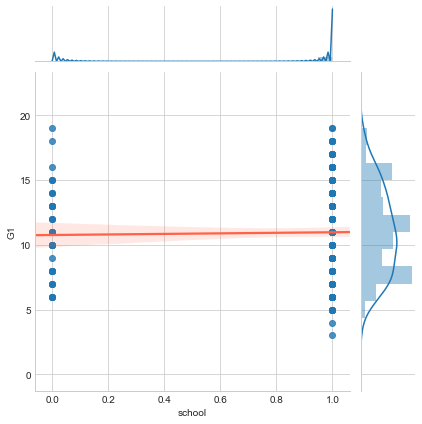

In [17]:
sns.jointplot(df_filter['school'], df_filter['G1'], kind='reg', line_kws={'color':'tomato'})

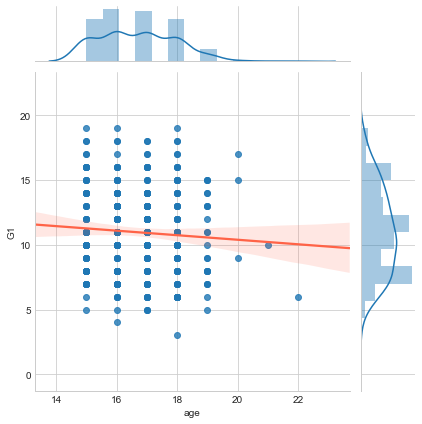

In [18]:
sns.jointplot(df_filter['age'], df_filter['G1'], kind='reg', line_kws={'color':'tomato'})

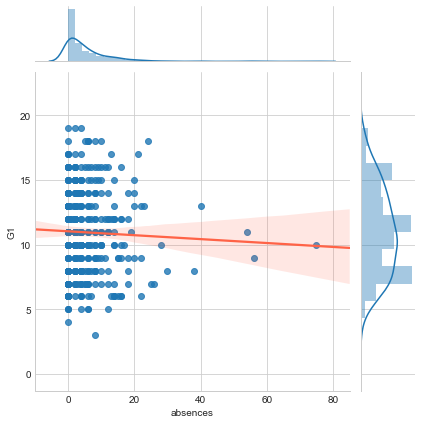

In [19]:
sns.jointplot(df_filter['absences'], df_filter['G1'], kind='reg', line_kws={'color':'tomato'})

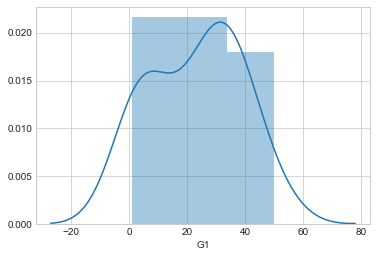

In [20]:
sns.distplot(df_filter['G1'].value_counts())

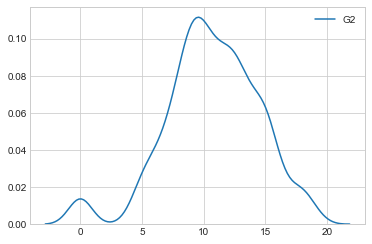

In [21]:
sns.kdeplot(df_filter['G2'])

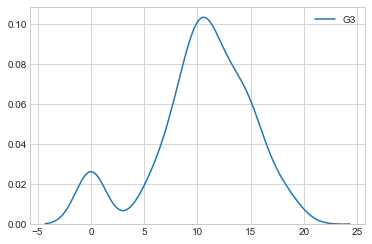

In [22]:
sns.kdeplot(df_filter['G3'])

### Se verifica que en G2 y G3 estan altamente relacionados, SE inicia a inferir que le G1 no afecta el resultado de manera tan determinante como el G2

In [23]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        390 non-null float64
sex           392 non-null float64
age           391 non-null float64
address       393 non-null float64
famsize       391 non-null float64
Pstatus       389 non-null float64
Medu          392 non-null float64
Fedu          390 non-null float64
Mjob          389 non-null float64
Fjob          395 non-null int64
reason        391 non-null float64
guardian      391 non-null float64
traveltime    392 non-null float64
studytime     390 non-null float64
failures      390 non-null float64
schoolsup     387 non-null float64
famsup        390 non-null float64
paid          394 non-null float64
activities    390 non-null float64
nursery       389 non-null float64
higher        389 non-null float64
internet      392 non-null float64
romantic      393 non-null float64
famrel        390 non-null float64
freetime      393 non-null float64
goout         390 non-

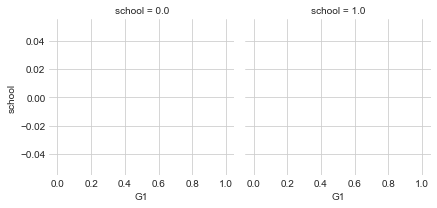

In [24]:
plot = sns.FacetGrid(data = df_filter, col = 'school', margin_titles = True)
sns.color_palette('Set1')
bins = np.linspace(0, 1, 4)
plot = plot.map(plt.hist, 'G1', lw = 0, bins = bins)
plot.set_axis_labels('G1', 'school')
sns.despine(left = True, bottom = True)

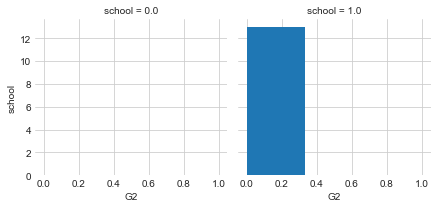

In [25]:
plot = sns.FacetGrid(data = df_filter, col = 'school', margin_titles = True)
sns.color_palette('Set1')
bins = np.linspace(0, 1, 4)
plot = plot.map(plt.hist, 'G2', lw = 0, bins = bins)
plot.set_axis_labels('G2', 'school')
sns.despine(left = True, bottom = True)

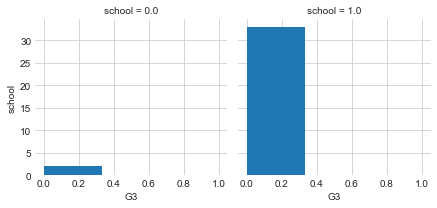

In [26]:
plot = sns.FacetGrid(data = df_filter, col = 'school', margin_titles = True)
sns.color_palette('Set1')
bins = np.linspace(0, 1, 4)
plot = plot.map(plt.hist, 'G3', lw = 0, bins = bins)
plot.set_axis_labels('G3', 'school')
sns.despine(left = True, bottom = True)

In [42]:
pd.crosstab(index=df_filter['G1'],
            columns=df_filter['school'], margins=True).apply(lambda r: r/len(df_filter) *100,
                                axis=1)

school,0.0,1.0,All
G1,,,
3.0,0.000000,0.253165,0.253165
4.0,0.000000,0.253165,0.253165
5.0,0.000000,1.772152,1.772152
6.0,1.265823,4.303797,5.569620
7.0,1.012658,7.848101,8.860759
8.0,1.518987,8.860759,10.379747
9.0,0.253165,7.594937,7.848101
10.0,1.518987,10.632911,12.151899
11.0,1.265823,8.354430,9.620253


In [41]:
pd.crosstab(index=df_filter['G1'],
            columns=df_filter['absences'], margins=True).apply(lambda r: r/len(df_filter) *100,
                                axis=1)

absences,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,25.0,26.0,28.0,30.0,38.0,40.0,54.0,56.0,75.0,All
G1,,,,,,,,,,,,,,,,,,,,,
3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.253165,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.253165
4.0,0.253165,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.253165
5.0,0.759494,0.000000,0.000000,0.000000,0.253165,0.000000,0.506329,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.772152
6.0,2.278481,0.000000,0.253165,0.000000,0.759494,0.000000,0.253165,0.253165,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.822785
7.0,3.797468,0.000000,1.012658,0.253165,0.759494,0.506329,0.759494,0.000000,0.253165,0.000000,...,0.253165,0.253165,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.860759
8.0,3.291139,0.000000,1.518987,0.000000,2.025316,0.253165,0.506329,0.253165,1.012658,0.000000,...,0.000000,0.000000,0.000000,0.253165,0.253165,0.000000,0.000000,0.000000,0.000000,10.126582
9.0,1.518987,0.000000,1.265823,0.253165,0.759494,0.000000,0.759494,0.000000,0.759494,0.253165,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.253165,0.000000,7.848101
10.0,2.278481,0.000000,2.025316,0.253165,2.784810,0.000000,1.518987,0.253165,0.506329,0.000000,...,0.000000,0.000000,0.253165,0.000000,0.000000,0.000000,0.000000,0.000000,0.253165,12.151899
11.0,2.278481,0.000000,2.025316,0.253165,1.265823,0.000000,0.759494,0.000000,0.506329,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.253165,0.000000,0.000000,9.620253


In [36]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
modelo_df = smf.ols('G1 ~ school+sex+age+address+famsize+Pstatus+Medu+Fedu+Mjob+Fjob+reason+guardian+traveltime+studytime+failures+schoolsup+famsup+paid+activities+nursery+higher+internet+romantic+famrel+freetime+goout+Dalc+Walc+health+absences',df_filter).fit()

In [44]:
modelo_df.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     3.228
Date:                Sat, 06 Jul 2019   Prob (F-statistic):           2.26e-07
Time:                        09:44:26   Log-Likelihood:                -700.32
No. Observations:                 286   AIC:                             1463.
Df Residuals:                     255   BIC:                             1576.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.1777      3.664      2.505      0.013       1.963      16.393
school         0.4196      0.652      0.644      0.520      -0.864       1.704
sex            0.4391      0.429      1.023      0.307      -0.407       1.285
age            0.0334      0.178      0.188      0.851      -0.318       0.384
address        0.1857      0.478      0.389      0.698      -0.756       1.127
famsize       -0.4974      0.436     -1.142      0.255      -1.355       0.361
Pstatus        0.0584      0.639      0.091      0.927      -1.199       1.316
Medu           0.2758      0.249      1.107      0.269      -0.215       0.766
Fedu           0.3584      0.223      1.609      0.109      -0.080       0.797
Mjob          -0.1802      0.169     -1.066      0.287      -0.513       0.153
Fjob           0.0983      0.226      0.436      0.663      -0.346       0.542
reason         0.1935      0.155      1.245      0.214      -0.113       0.500
guardian       0.0634      0.324      0.196      0.845      -0.575       0.702
traveltime    -0.0327      0.286     -0.114      0.909      -0.596       0.530
studytime      0.4245      0.243      1.745      0.082      -0.055       0.904
failures      -1.0219      0.272     -3.755      0.000      -1.558      -0.486
schoolsup     -1.7690      0.566     -3.128      0.002      -2.883      -0.655
famsup        -0.8477      0.414     -2.045      0.042      -1.664      -0.032
paid          -0.1820      0.402     -0.453      0.651      -0.974       0.610
activities    -0.4449      0.371     -1.200      0.231      -1.175       0.285
nursery       -0.0183      0.461     -0.040      0.968      -0.925       0.889
higher         1.0096      0.867      1.164      0.246      -0.699       2.718
internet       0.1215      0.503      0.242      0.809      -0.869       1.112
romantic       0.0269      0.400      0.067      0.946      -0.760       0.814
famrel         0.0781      0.212      0.367      0.714      -0.340       0.496
freetime       0.3596      0.191      1.878      0.062      -0.017       0.737
goout         -0.7172      0.200     -3.589      0.000      -1.111      -0.324
Dalc          -0.0412      0.278     -0.148      0.882      -0.589       0.506
Walc           0.0938      0.206      0.456      0.648      -0.311       0.499
health        -0.2393      0.141     -1.691      0.092      -0.518       0.039
absences      -0.0099      0.024     -0.408      0.683      -0.058       0.038
==============================================================================
Omnibus:                        4.881   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.087   Jarque-Bera (JB):                3.631
Skew:                           0.145   Prob(JB):                        0.163
Kurtosis:                       2.531   Cond. No.                         434.
==

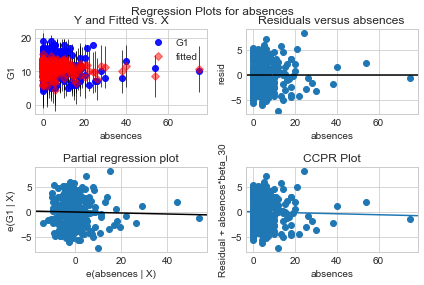

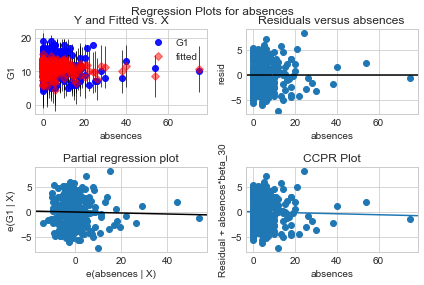

In [48]:
sm.graphics.plot_regress_exog(modelo_df, 'absences')

In [31]:
columns = df.columns.values
attr_name,pearson_r,abs_pearson_r = [],[],[]

for col in columns:
    if col != 'earn':
        attr_name.append(col)
        pearson_r.append(df_filter[col].corr(df_filter['G1']))
        abs_pearson_r.append(abs(df_filter[col].corr(df_filter['G1'])))
features = pd.DataFrame(
    {'attribute': attr_name,
    'corr': pearson_r,
    'abs_corr': abs_pearson_r}
)   

features = features.set_index('attribute')
features.sort_values(by=['abs_corr'], ascending =False)

,corr,abs_corr
attribute,,
G1,1.000000,1.000000
G2,0.851263,0.851263
G3,0.801366,0.801366
failures,-0.352140,0.352140
schoolsup,-0.200554,0.200554
Medu,0.193389,0.193389
higher,0.183862,0.183862
Fedu,0.183592,0.183592
studytime,0.165170,0.165170


# La inspección de datos perdidos en las variables. (1 punto)

In [32]:
import missingno as msgn

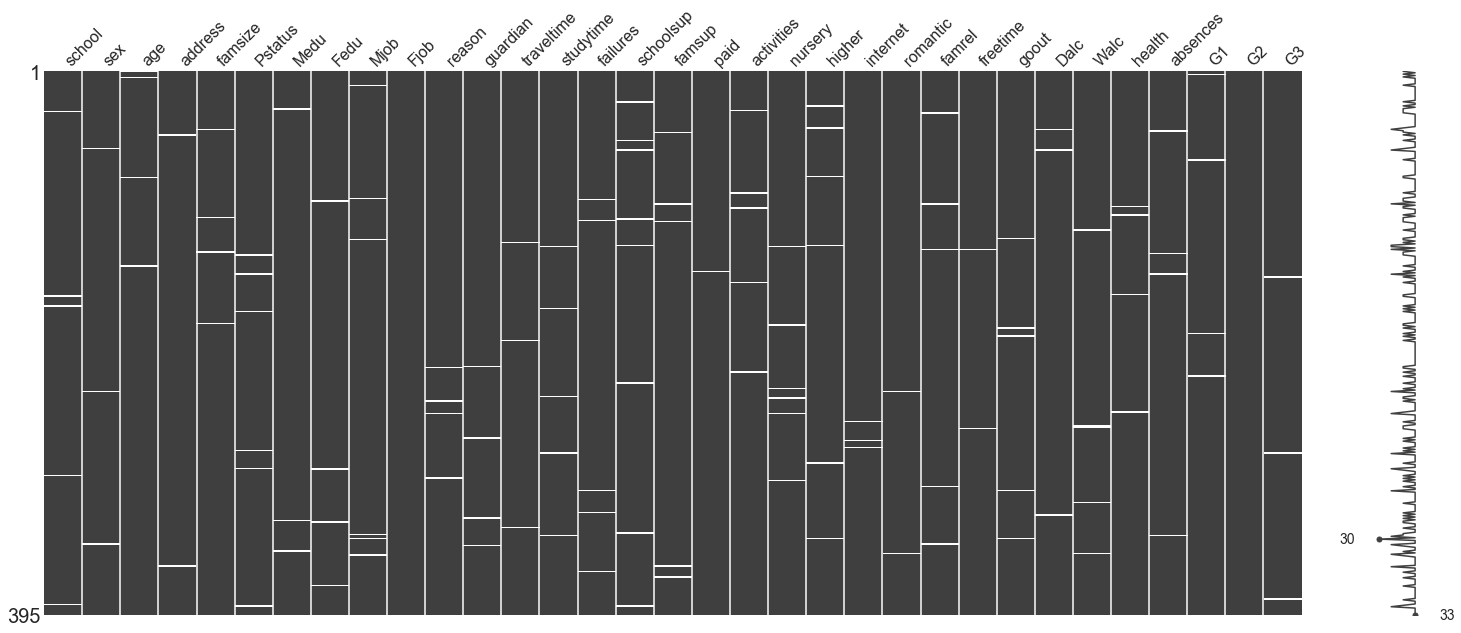

In [33]:
msgn.matrix(df_filter)

    En este dataset vemos (tal cual el enunciado inicial) gran cantidad de datos mal ingresados o ausentes, por el momento es mejor no inferir que hacer con la data, aunque en un futuro hito, se ve una urgencia en mejorar la prediccion del modelo